Part b3. use the pure pytorch linear modules etc.,. - high level primitives and build neural network

# Import Libraries

In [1]:
pip install tsne

     |████████████████████████████████| 552kB 5.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp37-cp37m-linux_x86_64.whl size=260473 sha256=971516b82f57f310e09dc5b8a56de59702572f9f11b34034cabc0932eb1c9ca0
  Stored in directory: /root/.cache/pip/wheels/3e/d6/fc/58392f18ea8fc4c74e20185d2faeee87a1c1924a182606c6cd
Successfully built tsne


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import torch
import torch.nn as nn

# Define plot method

In [3]:
#Plot using TSNE
from tsne import bh_sne
def tsne_plot(x_tensor, y_true_tensor):
  vis_data = bh_sne(x_tensor)
  # plot the result
  vis_x = vis_data[:, 0]
  vis_y = vis_data[:, 1]
  plt.scatter(vis_x, vis_y, c=y_true_tensor, cmap=plt.cm.get_cmap("jet", 10))
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  plt.show()

# High Level Primitive model

In [4]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2),   
)

# Loss function


In [5]:
loss_fn = torch.nn.MSELoss(reduction='mean')

# Callable method

In [6]:
def fit(x, y, model: Callable, loss_fn: Callable, lr: float, num_epochs: int):
  for t in range(num_epochs):
      y_pred = model(x)
      # Compute and print loss. 
      loss = loss_fn(y_pred, y)
      if t % 100 == 99:
          print(t, loss.item())

      # Zero the gradients before running the backward pass.
      model.zero_grad()

      # Backward pass: compute gradient of the loss with respect to all the learnable
      # parameters of the model.
      loss.backward()

      # Update the weights using gradient descent.
      with torch.no_grad():
          for param in model.parameters():
              param -= lr * param.grad

In [9]:
d = 3
n = 500
epochs = 1000
inputs = np.random.uniform(-1, 1, (n,d))
weights_true = np.array([[2 , -1, 1], [1, -1, 1]]).T
bias_true = np.array([10])
y_true = (inputs**3) @ weights_true + (inputs**2) @ weights_true + inputs @ weights_true + bias_true
loss = nn.MSELoss()
x_tensor = torch.tensor(inputs).float()
y_true_tensor = torch.tensor(y_true).float()
learning_rate = 0.01
fit(x_tensor, y_true_tensor, model, loss_fn, learning_rate, epochs)

99 0.6000027656555176
199 0.5020190477371216
299 0.4192504286766052
399 0.3674308955669403
499 0.32916370034217834
599 0.2938525974750519
699 0.26110607385635376
799 0.23166385293006897
899 0.20454059541225433
999 0.18001417815685272


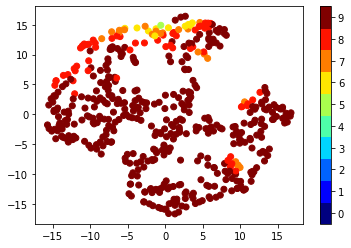

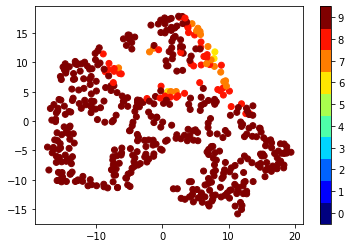

In [10]:
tsne_plot(inputs, y_true[:,0])
tsne_plot(inputs, y_true[:,1])